# Разбираем 
```python
# Creating a parameter grid for GridSearchCV
param_grid = {'estimator__loss': ['hinge', 'log', 'modified_huber'],
              'estimator__penalty': ['l1', 'l2'],
              'estimator__alpha': [0.001, 0.01, 0.1]}
```

To visualize the Huber loss, log loss, and hinge loss, you can create a plot with these loss functions using Matplotlib. Here's an example of how you can visualize these loss functions:

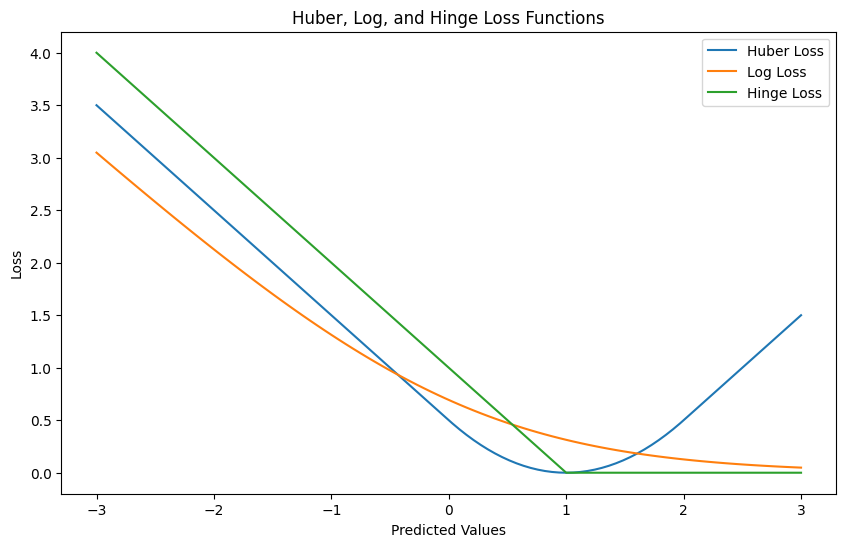

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss functions
def huber_loss(y_true, y_pred, delta=1.0):
    residual = np.abs(y_true - y_pred)
    return np.where(residual < delta, 0.5 * residual ** 2, delta * (residual - 0.5 * delta))

def log_loss(y_true, y_pred):
    return np.log(1 + np.exp(-y_true * y_pred))

def hinge_loss(y_true, y_pred):
    return np.maximum(0, 1 - y_true * y_pred)

# Generate the range of true and predicted values
y_true = np.ones(100)
y_pred = np.linspace(-3, 3, 100)

# Calculate loss values
huber_values = huber_loss(y_true, y_pred)
log_values = log_loss(y_true, y_pred)
hinge_values = hinge_loss(y_true, y_pred)

# Plot the loss functions
plt.figure(figsize=(10, 6))
plt.plot(y_pred, huber_values, label='Huber Loss')
plt.plot(y_pred, log_values, label='Log Loss')
plt.plot(y_pred, hinge_values, label='Hinge Loss')
plt.xlabel('Predicted Values')
plt.ylabel('Loss')
plt.legend()
plt.title('Huber, Log, and Hinge Loss Functions')
plt.show()


To visualize the effect of L1 and L2 penalties, we can train a model with each penalty and plot the coefficients. L1 penalty (Lasso regularization) tends to create sparse coefficients, driving some of them to zero, while L2 penalty (Ridge regularization) usually creates smooth, small coefficients.

Here's an example using a synthetic dataset:

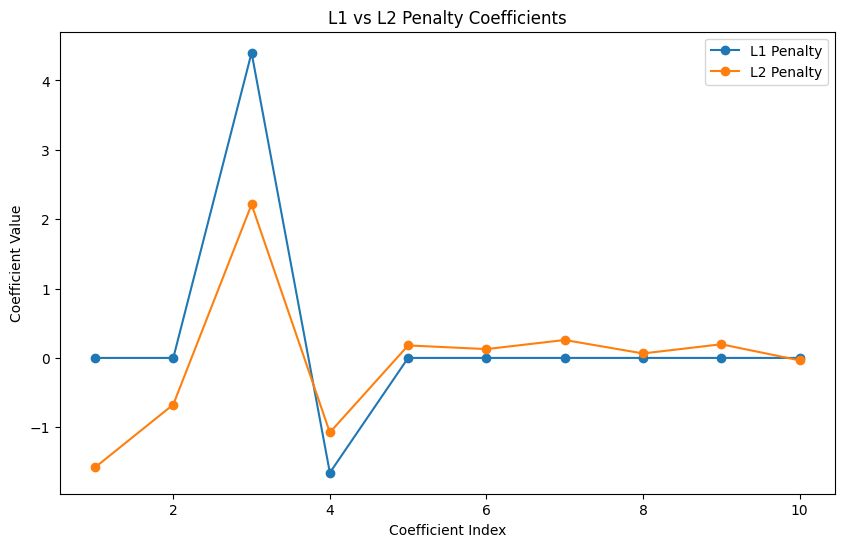

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

# Train models with L1 and L2 penalties
model_l1 = LogisticRegression(penalty='l1', solver='liblinear').fit(X, y)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear').fit(X, y)

# Get coefficients
coef_l1 = model_l1.coef_.ravel()
coef_l2 = model_l2.coef_.ravel()

# Plot the coefficients
x_values = np.arange(1, len(coef_l1) + 1)
plt.figure(figsize=(10, 6))
plt.plot(x_values, coef_l1, marker='o', label='L1 Penalty')
plt.plot(x_values, coef_l2, marker='o', label='L2 Penalty')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.title('L1 vs L2 Penalty Coefficients')
plt.show()


In this example, we first create a synthetic dataset using make_classification from sklearn. Then, we train two logistic regression models with L1 and L2 penalties. We extract the coefficients of each model and create a plot to visualize them.

From the plot, you can observe how L1 penalty produces sparser coefficients, with some of them being exactly zero, while L2 penalty results in smoother, smaller coefficients. L1 penalty helps in feature selection by driving irrelevant features' coefficients to zero, whereas L2 penalty helps prevent overfitting by constraining the coefficients to small values.

## Explain and visuzlize 'estimator\_\_alpha': \[0.001, 0.01, 0.1\]

The `alpha` parameter in the SGDClassifier is a regularization term, which controls the amount of regularization applied to the model. Regularization helps to prevent overfitting by adding a penalty to the loss function that the model tries to minimize. A larger `alpha` value corresponds to stronger regularization.

To visualize the effect of different `alpha` values, we can train models with different alpha values and plot their coefficients.

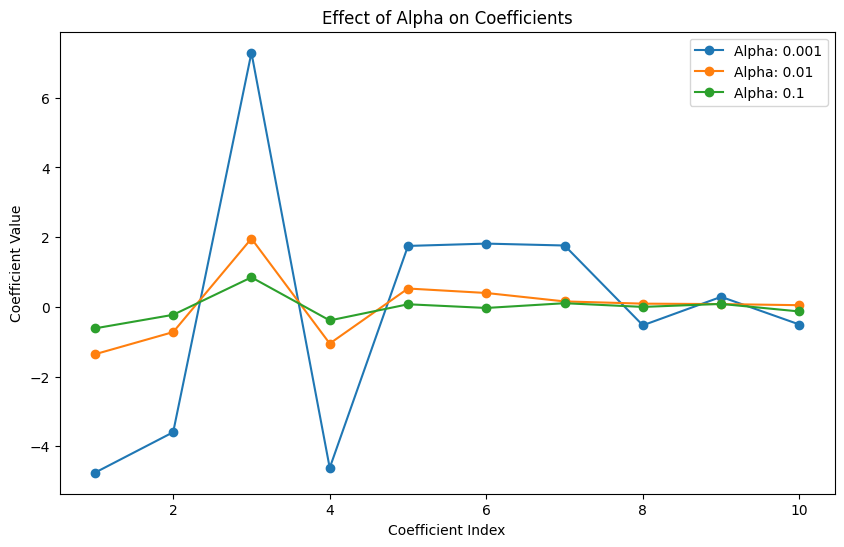

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=10, random_state=42)

alphas = [0.001, 0.01, 0.1]
models = []

# Train models with different alpha values
for alpha in alphas:
    model = SGDClassifier(alpha=alpha, penalty='l2', max_iter=10000, random_state=42).fit(X, y)
    models.append(model)

# Get coefficients
coef_alpha = [model.coef_.ravel() for model in models]

# Plot the coefficients
x_values = np.arange(1, len(coef_alpha[0]) + 1)
plt.figure(figsize=(10, 6))

for i, alpha in enumerate(alphas):
    plt.plot(x_values, coef_alpha[i], marker='o', label=f'Alpha: {alpha}')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.title('Effect of Alpha on Coefficients')
plt.show()


From the plot, you can observe that as the alpha value increases, the coefficients of the model decrease in magnitude, making the model more regularized. A smaller alpha value results in a less regularized model, allowing the coefficients to have higher magnitudes. Selecting the right alpha value is a trade-off between underfitting and overfitting.